<a href="https://colab.research.google.com/github/Basytism/-PORTFOLIO-PROJECT-SET/blob/main/crypto_trading_trend_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files
uploaded = files.upload()



Saving dummy_crypto_btcusdt.csv to dummy_crypto_btcusdt.csv


In [7]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("dummy_crypto_btcusdt.csv")
df['Open Time'] = pd.to_datetime(df['Open Time'])

df.head()


,Open Time,Open,High,Low,Close,Volume
0,2025-04-11 00:57:53.883043,26694.065860,26935.281477,26222.659410,26646.348764,2768.220353
1,2025-04-12 00:57:53.883043,26730.597274,27094.863125,26534.209081,26555.338241,2441.640493
2,2025-04-13 00:57:53.883043,26856.353865,27358.864542,26653.198937,26995.442652,1725.122242
3,2025-04-14 00:57:53.883043,27126.696636,27406.287794,26714.173070,26991.504259,4187.783081
4,2025-04-15 00:57:53.883043,26869.672449,27119.801368,26377.625919,26913.107235,4082.041843


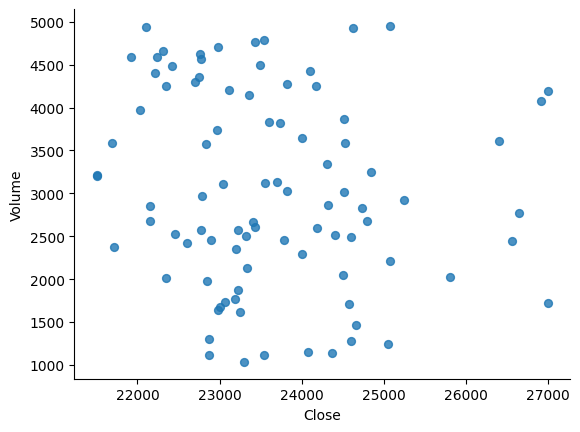

In [16]:
# @title Close vs Volume

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Close', y='Volume', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
fig = go.Figure(data=[go.Candlestick(
    x=df['Open Time'],
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    increasing_line_color='green',
    decreasing_line_color='red'
)])

fig.update_layout(title='📉 BTC/USDT Candlestick (Dummy Data)',
                  xaxis_title='Date', yaxis_title='Price (USDT)',
                  xaxis_rangeslider_visible=False)

fig.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.



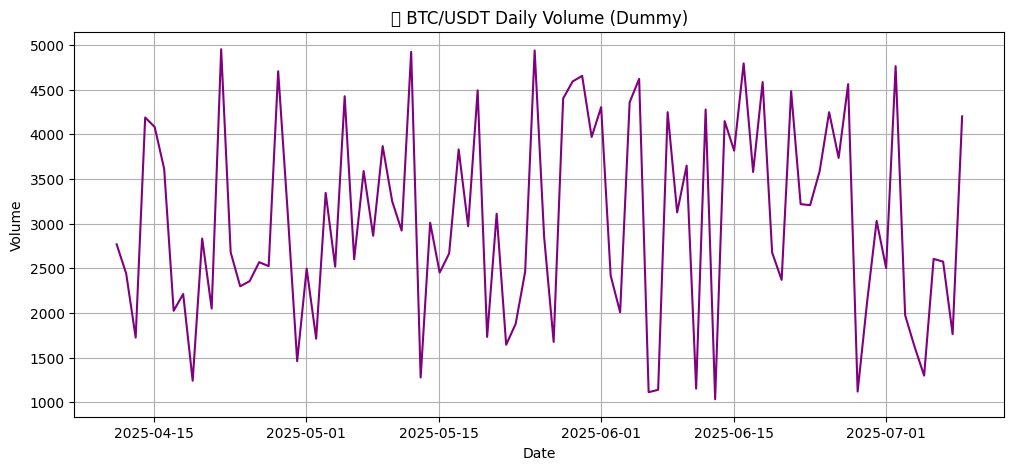

In [9]:
plt.figure(figsize=(12, 5))
plt.plot(df['Open Time'], df['Volume'], color='purple')
plt.title('📊 BTC/USDT Daily Volume (Dummy)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.



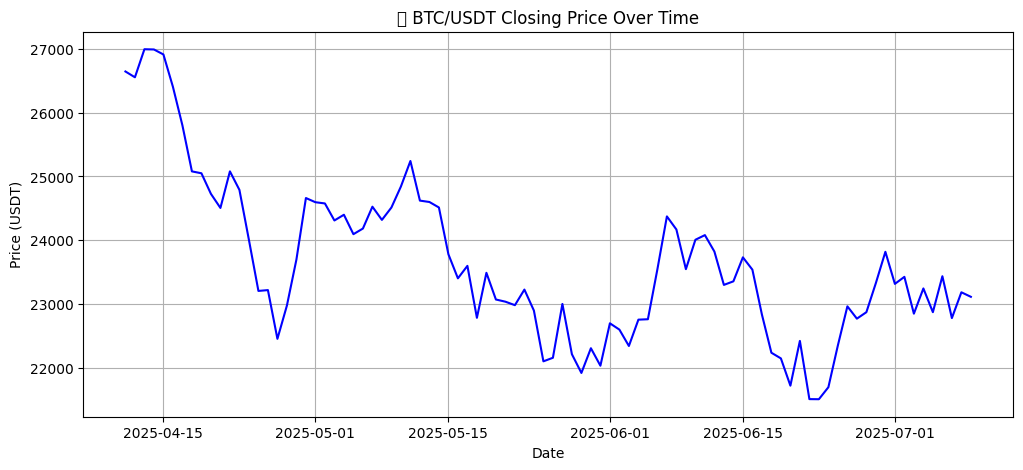

In [10]:
plt.figure(figsize=(12, 5))
plt.plot(df['Open Time'], df['Close'], label='Close Price', color='blue')
plt.title('📈 BTC/USDT Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USDT)')
plt.grid(True)
plt.show()


In [11]:
# Upload ETH dummy data
from google.colab import files
files.upload()  # Upload `dummy_crypto_ethusdt.csv`


Saving dummy_crypto_ethusdt.csv to dummy_crypto_ethusdt.csv


{'dummy_crypto_ethusdt.csv': b'Open Time,Open,High,Low,Close,Volume\n2025-04-11 01:00:37.118324,1795.985155801737,1861.933794232763,1773.2662126639789,1849.0422986078195,1087.318990243511\n2025-04-12 01:00:37.118324,1801.5743546070314,1823.383641989594,1771.4183578700347,1813.7995995390997,608.6394095204372\n2025-04-13 01:00:37.118324,1785.4881980268074,1821.467773049956,1746.8088930207862,1791.8381662773625,1413.1599178306442\n2025-04-14 01:00:37.118324,1774.164907310542,1802.7391582097107,1738.5249602354395,1743.4433942090548,689.7567657845391\n2025-04-15 01:00:37.118324,1770.4252806647164,1809.6895898517193,1701.4480317365246,1722.2693991539813,1737.9718894214832\n2025-04-16 01:00:37.118324,1704.7254240776247,1781.137240176058,1652.1940611845298,1728.7650755037514,1595.3674480819743\n2025-04-17 01:00:37.118324,1701.9149394114802,1750.5748407086955,1675.805713746308,1747.9079160793235,864.6089551726004\n2025-04-18 01:00:37.118324,1726.7922529112159,1798.3404547692876,1673.43251057396

In [14]:
eth = pd.read_csv('dummy_crypto_ethusdt.csv')
eth['Open Time'] = pd.to_datetime(eth['Open Time'])


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128185 (\N{CHART WITH UPWARDS TREND AND YEN SIGN}) missing from font(s) DejaVu Sans.



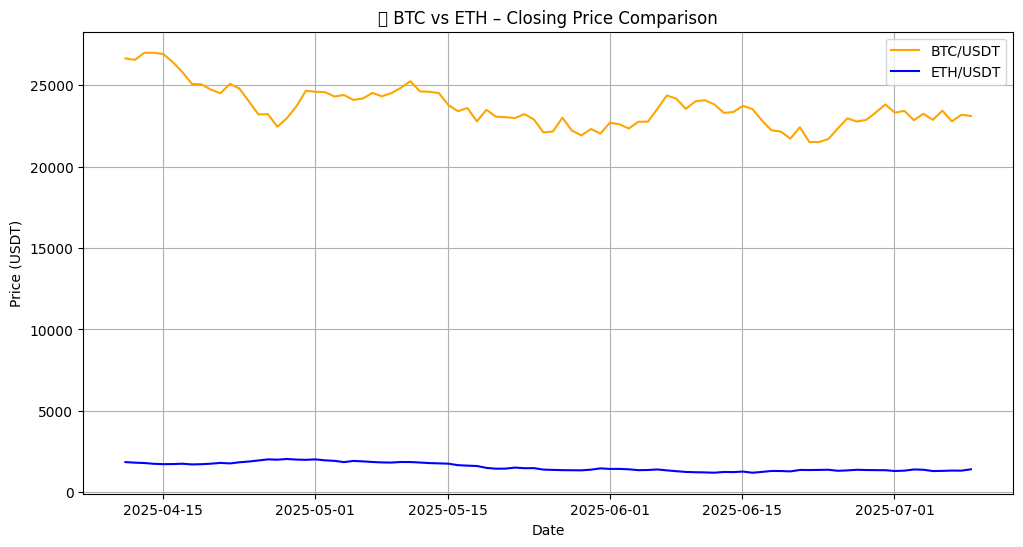

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open Time'], df['Close'], label='BTC/USDT', color='orange')
plt.plot(eth['Open Time'], eth['Close'], label='ETH/USDT', color='blue')
plt.title('💹 BTC vs ETH – Closing Price Comparison')
plt.xlabel('Date')
plt.ylabel('Price (USDT)')
plt.legend()
plt.grid(True)
plt.show()


**Author: Abdul Basit Noor | Powered by Synergy Spheres 3.0**